In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.2.1 판다스를 사용해 데이터 프레임 만들기

In [3]:
import pandas as pd

file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

heart_df = pd.read_csv(file_url)

print( 'Pandas DataFrame :', type(heart_df) )

Pandas DataFrame : <class 'pandas.core.frame.DataFrame'>


In [4]:
# pandas dataFrame
print( heart_df.shape )

heart_df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


## 3.2.2 tf.data를 사용해 데이터셋 만들기

In [5]:
import tensorflow as tf
from tensorflow.data.experimental import make_csv_dataset

file_name = "/content/drive/MyDrive/Colab Notebooks/data/Cleveland Clinic Foundations for Heart Disease/heart.csv"
heart_ds = make_csv_dataset(file_name, batch_size=2)

print( 'tf.data : ', type(heart_ds) )

tf.data :  <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [6]:
iterator = heart_ds.as_numpy_iterator()

print( dict(next(iterator)) )

{'age': array([51, 45], dtype=int32), 'sex': array([0, 1], dtype=int32), 'cp': array([3, 4], dtype=int32), 'trestbps': array([130, 142], dtype=int32), 'chol': array([256, 309], dtype=int32), 'fbs': array([0, 0], dtype=int32), 'restecg': array([2, 2], dtype=int32), 'thalach': array([149, 147], dtype=int32), 'exang': array([0, 1], dtype=int32), 'oldpeak': array([0.5, 0. ], dtype=float32), 'slope': array([1, 2], dtype=int32), 'ca': array([0, 3], dtype=int32), 'thal': array([b'normal', b'reversible'], dtype=object), 'target': array([0, 1], dtype=int32)}


## Pandas 데이터 프레임을 tf.data.Dataset으로 변환하기

In [7]:
df = heart_df.copy()
label = df.pop('target')

ds = tf.data.Dataset.from_tensor_slices((dict(df), label))
ds = ds.batch(2)

print( 'tf.data : ', type(ds) )

tf.data :  <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [8]:
print(list(ds.as_numpy_iterator()))

[({'age': array([63, 67]), 'sex': array([1, 1]), 'cp': array([1, 4]), 'trestbps': array([145, 160]), 'chol': array([233, 286]), 'fbs': array([1, 0]), 'restecg': array([2, 2]), 'thalach': array([150, 108]), 'exang': array([0, 1]), 'oldpeak': array([2.3, 1.5]), 'slope': array([3, 2]), 'ca': array([0, 3]), 'thal': array([b'fixed', b'normal'], dtype=object)}, array([0, 1])), ({'age': array([67, 37]), 'sex': array([1, 1]), 'cp': array([4, 3]), 'trestbps': array([120, 130]), 'chol': array([229, 250]), 'fbs': array([0, 0]), 'restecg': array([2, 0]), 'thalach': array([129, 187]), 'exang': array([1, 0]), 'oldpeak': array([2.6, 3.5]), 'slope': array([2, 3]), 'ca': array([2, 0]), 'thal': array([b'reversible', b'normal'], dtype=object)}, array([0, 0])), ({'age': array([41, 56]), 'sex': array([0, 1]), 'cp': array([2, 2]), 'trestbps': array([130, 120]), 'chol': array([204, 236]), 'fbs': array([0, 0]), 'restecg': array([2, 0]), 'thalach': array([172, 178]), 'exang': array([0, 0]), 'oldpeak': array([1

## 3.2.4 이미지 파일을 데이터셋으로 불러오기

In [9]:
import tensorflow as tf
from tensorflow.keras.utils import get_file
import os
#import pathlib

train_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

def get_data(fname, origin, extract):
    data_dir = get_file(fname=fname, origin=origin, extract=extract)
    data_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')
    return data_dir

path_dir = get_data('train.zip', train_url, 'True')

train_dir = os.path.join(path_dir, 'train')
validation_dir = os.path.join(path_dir, 'validation')

print(path_dir, '\n')
print(train_dir, '\n')
print(validation_dir)

68606236/68606236 [==============================] - 0s 0us/step
/root/.keras/datasets/cats_and_dogs_filtered 

/root/.keras/datasets/cats_and_dogs_filtered/train 

/root/.keras/datasets/cats_and_dogs_filtered/validation


In [10]:
# the Cats vs Dogs dataset
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

!unzip -q kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1213  100  1213    0     0   1708      0 --:--:-- --:--:-- --:--:--  1706
[kagglecatsanddogs_3367a.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of kagglecatsanddogs_3367a.zip or
        kagglecatsanddogs_3367a.zip.zip, and cannot find kagglecatsanddogs_3367a.zip.ZIP, period.


In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

PetImages_ds = image_dataset_from_directory(
  directory=train_dir,
  labels='inferred',
  batch_size=32,# Default: 32
  image_size=(256, 256),# Defaults: (256, 256)
  shuffle=True,# Default: True
  seed=0)

Found 2000 files belonging to 2 classes.


In [12]:
print("Label 0 : ", PetImages_ds.class_names[0])
print("Label 1 : ", PetImages_ds.class_names[1])

Label 0 :  cats
Label 1 :  dogs


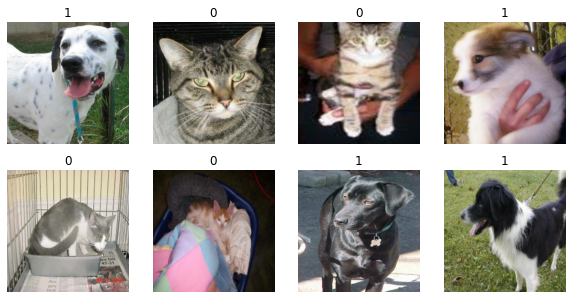

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for image, label in PetImages_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(int(label[i]))
        plt.axis("off")

## 3.2.5 텍스트 파일을 데이터셋으로 불러오기

In [14]:
# Load the data: IMDB movie review sentiment classification
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  18.1M      0  0:00:04  0:00:04 --:--:-- 18.1M


In [15]:
%%time
!tar -xf aclImdb_v1.tar.gz

CPU times: user 59.5 ms, sys: 31.3 ms, total: 90.7 ms
Wall time: 7.38 s


In [16]:
!du -h /content/aclImdb

203M	/content/aclImdb/train/unsup
51M	/content/aclImdb/train/neg
51M	/content/aclImdb/train/pos
367M	/content/aclImdb/train
51M	/content/aclImdb/test/neg
51M	/content/aclImdb/test/pos
122M	/content/aclImdb/test
490M	/content/aclImdb


In [17]:
from tensorflow.keras.preprocessing import text_dataset_from_directory

aclImdb_ds = text_dataset_from_directory(
    directory = "/content/aclImdb/train",
    labels="inferred",
    batch_size=32,
    seed=0
)

Found 75000 files belonging to 3 classes.


In [18]:
print("Label 0 : ", aclImdb_ds.class_names[0])
print("Label 1 : ", aclImdb_ds.class_names[1])
print("Label 2 : ", aclImdb_ds.class_names[2])

Label 0 :  neg
Label 1 :  pos
Label 2 :  unsup


In [19]:
for text, label in aclImdb_ds.take(1):
    for i in range(2):
        print(text.numpy()[i])
        print(label.numpy()[i])

b"'Playing for Time' starring Vanessa Redgrave first aired in 1980 and is based on a true story. A true story teaching the lessons of intolerance and the horrors of the Holocaust. In much the way Sharazod (the mythical wife of a King) would save her own life each night by telling her husband a story but never finishing the tale; in 'Playing for Time' the inmates of a death camp play music for the amusement of the guards thereby escaping extermination. But this is no myth it's a very real means of survival for desperate inmates. <br /><br />'Playing for Time' is a great movie but gets a little boring. I found myself playing a video game instead of paying close attention to the movie."
2
b"This is the only full length feature film about the world of bridge. I found the first 10 minutes a bit slow, but after that, the movie is absolutely perfect in describing professional bridge players and how they go about earning a living. <br /><br />Some of the scenes are very funny. I don't think th